In [8]:
import pandas as pd
import numpy as np
import json
import os
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline

In [12]:
# Set errorbar style
mpl.rcParams['errorbar.capsize'] = 5
mpl.rcParams['lines.markeredgewidth'] = 1

In [2]:
FIGSIZE = (13, 6)
CONFIDENCE = 0.95

In [3]:
def errors(estimates):
    """
    Return the confidence interval given the statistics of bootstrap resamplings.
    Computes the lower and uppper bounds of the confidence interval.
    """
    m, se = np.mean(estimates), np.std(estimates)
    lower, upper = scipy.stats.norm.interval(CONFIDENCE, loc=m, scale=se)
    return lower, upper

In [23]:
with open('incent_results.json') as f:
    incent = json.load(f)
with open('non_incent_results.json') as f:
    non_incent = json.load(f)
plot_names = list(incent[0].keys())
plot_names

['sentiment_distribution_by_rating',
 'avg_length_by_category',
 'avg_compound_by_category',
 'num_reviews_by_price_tier',
 'avg_length_by_price_tier',
 'avg_length_by_overall',
 'avg_compound_by_rating',
 'num_reviews_by_category',
 'num_reviews_by_overall']

avg_length_by_category


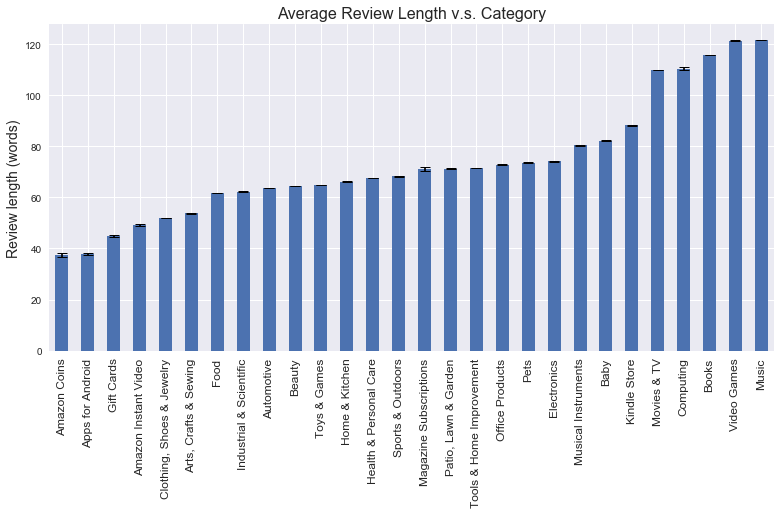

In [15]:
name = 'avg_length_by_category'
print(name)

# Put data into a dataframe, and compute mean and confidence interval
data = sum([d[name] for d in bootstrap_data], [])
df = pd.DataFrame(data)
df = df.groupby('main_category').agg({'_c1': [np.mean, np.std, errors]})
df.columns = df.columns.droplevel()

# Sort by values
df.sort_values(by='mean', inplace=True)

# Plot
fig, ax = plt.subplots(figsize=FIGSIZE)
err = np.array(df.errors.values.tolist())-df['mean'].values[..., np.newaxis]
df['mean'].plot(kind='bar', ax=ax, yerr=err.T, ecolor='k')

# Settings of the plot
plt.title('Average Review Length v.s. Category', fontsize=16)
plt.xlabel('')
plt.ylabel('Review length (words)', fontsize=14)
plt.xticks(fontsize=12)

# Save the plot
fig.savefig(name+'.png', bbox_inches='tight')